In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display plots inline
%matplotlib inline

In [50]:
# Load the Boston Housing dataset using read_csv
boston_df = pd.read_csv('boston_housing.csv')

# Display the first few rows of the dataset
print("Boston Housing Dataset loaded successfully")
print(f"Number of samples: {boston_df.shape[0]}")
print(f"Number of features: {boston_df.shape[1]}")
boston_df.head()

Boston Housing Dataset loaded successfully
Number of samples: 50
Number of features: 14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [51]:
print("Boston Housing Dataset Exploration")
print("\nDataset dimensions:", boston_df.shape)
print("\nFeature names:", boston_df.columns.tolist())
print("\nFirst 5 rows of the dataset:")
boston_df.head()

Boston Housing Dataset Exploration

Dataset dimensions: (50, 14)

Feature names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

First 5 rows of the dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [52]:
print("Target variable (house prices) summary:")
boston_df['MEDV'].describe()

Target variable (house prices) summary:


count    50.000000
mean     20.502000
std       6.024355
min      12.700000
25%      15.825000
50%      19.500000
75%      23.050000
max      36.200000
Name: MEDV, dtype: float64

In [53]:
# Check for missing values
print("Missing values in features:")
print(boston_df.isnull().sum())

Missing values in features:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [54]:
# Basic statistics of the features
print("Feature statistics:")
boston_df.describe()

Feature statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,0.491052,5.110000,6.981800,0.0,0.504760,6.086760,66.820000,4.860036,3.800000,281.880000,18.998000,378.388600,13.20300,20.502000
std,0.464548,15.227623,1.822649,0.0,0.039906,0.426041,28.696697,0.905142,0.903508,34.189532,2.109018,36.850735,6.74877,6.024355
min,0.006320,0.000000,2.180000,0.0,0.428000,5.399000,2.900000,3.360300,1.000000,222.000000,15.200000,232.600000,1.98000,12.700000
25%,0.102447,0.000000,6.910000,0.0,0.458000,5.818250,42.575000,4.091300,3.000000,242.000000,17.900000,381.015000,8.54500,15.825000
50%,0.222330,0.000000,7.870000,0.0,0.524000,5.997000,74.200000,4.590300,4.000000,307.000000,19.200000,392.635000,12.61500,19.500000
75%,0.831082,0.000000,8.140000,0.0,0.538000,6.201250,91.350000,5.720900,4.000000,307.000000,21.000000,396.582500,17.23500,23.050000
max,1.612820,75.000000,8.140000,0.0,0.538000,7.185000,100.000000,6.592100,5.000000,311.000000,21.000000,396.900000,30.81000,36.200000


In [55]:
# Correlation with the target variable
# Extract features and target
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

correlations = pd.DataFrame(X.corrwith(y).sort_values(ascending=False))
correlations.columns = ['Correlation with MEDV']
print("Correlations with house prices (MEDV):")
correlations

Correlations with house prices (MEDV):


,Correlation with MEDV
RM,0.765477
ZN,0.419066
DIS,0.413941
B,0.386423
PTRATIO,-0.352604
RAD,-0.395486
TAX,-0.576842
NOX,-0.598449
AGE,-0.648721
CRIM,-0.649819


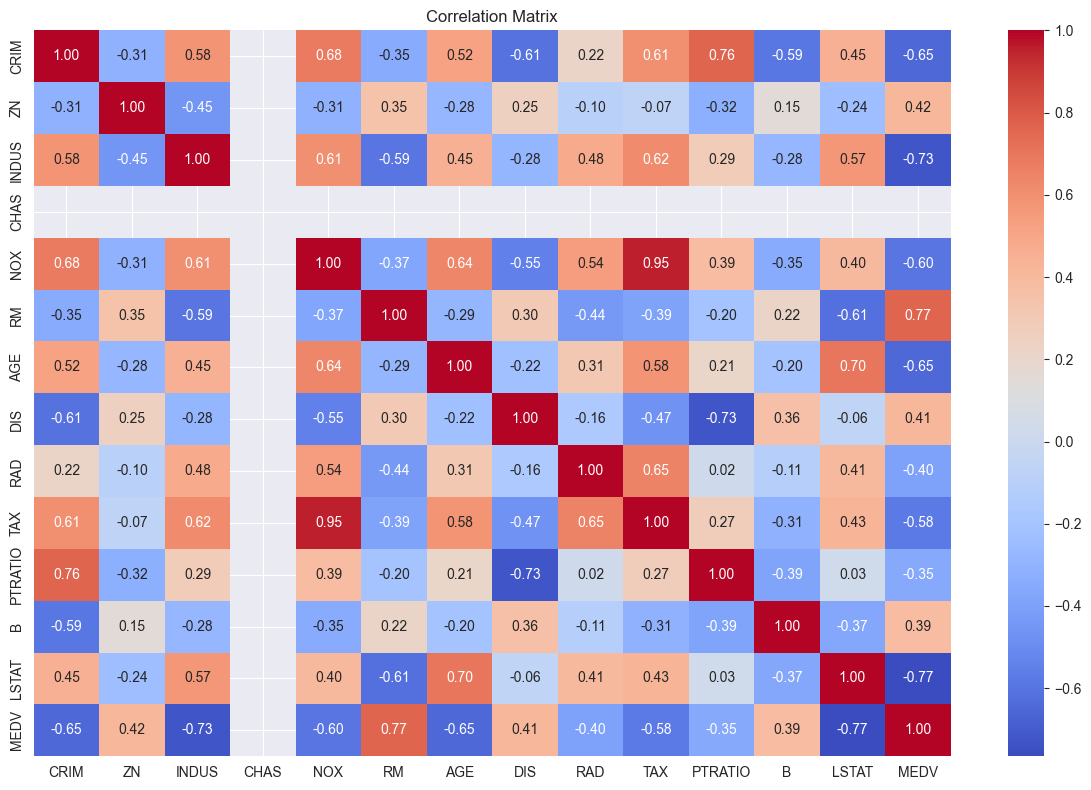

In [56]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (40, 13)
Testing set shape: (10, 13)


In [58]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Evaluation:")
print(f"Training MSE: {train_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Testing R²: {test_r2:.2f}")

Model Evaluation:
Training MSE: 4.04
Training RMSE: 2.01
Training R²: 0.89
Testing MSE: 1.38
Testing RMSE: 1.18
Testing R²: 0.95


In [61]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

print("Feature importance (coefficients):")
feature_importance

Feature importance (coefficients):


,Feature,Coefficient
9,TAX,-4.479011e+01
4,NOX,3.843875e+01
1,ZN,1.060528e+01
2,INDUS,6.045812e+00
8,RAD,5.783596e+00
6,AGE,-2.506776e+00
10,PTRATIO,-2.119446e+00
5,RM,2.097340e+00
0,CRIM,-1.499733e+00
7,DIS,-1.026746e+00


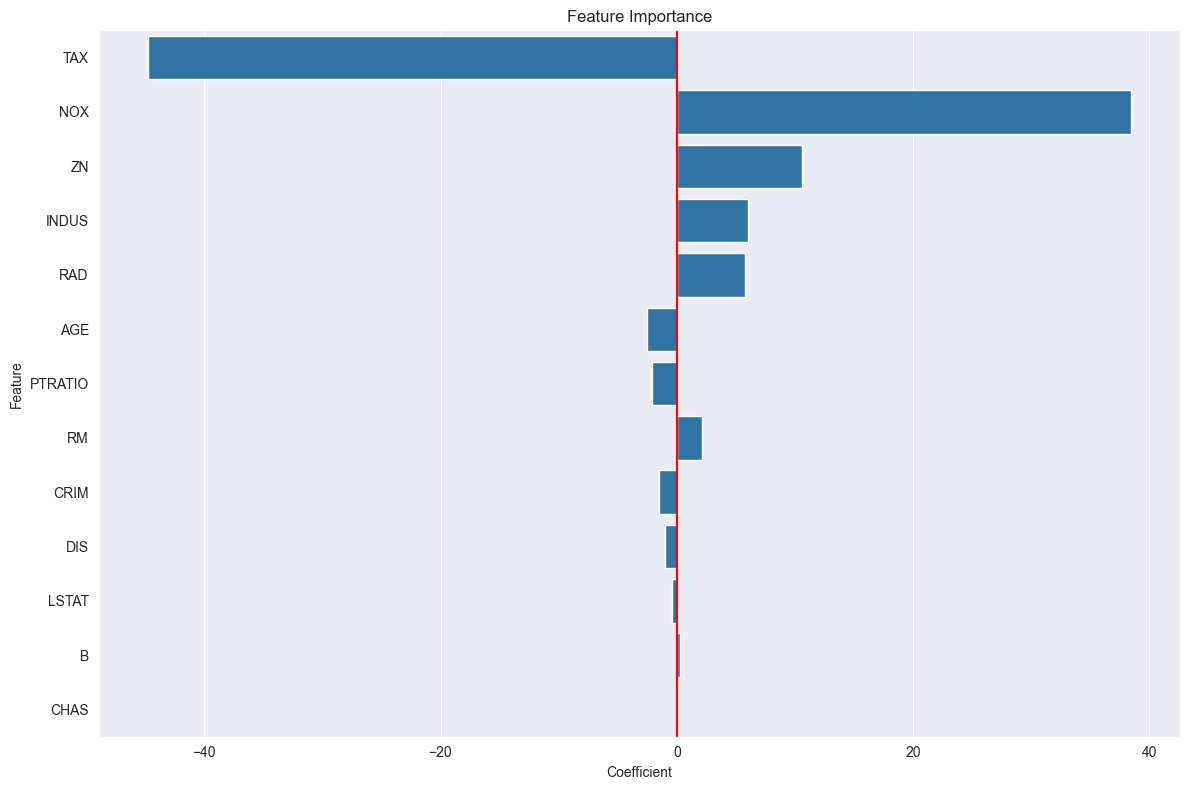

In [62]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.axvline(x=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

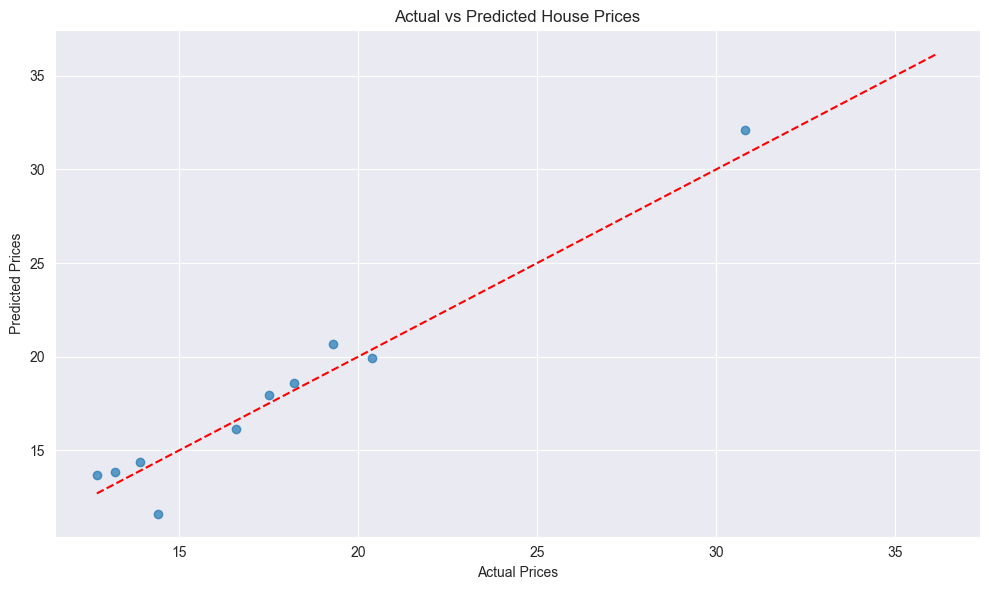

In [63]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

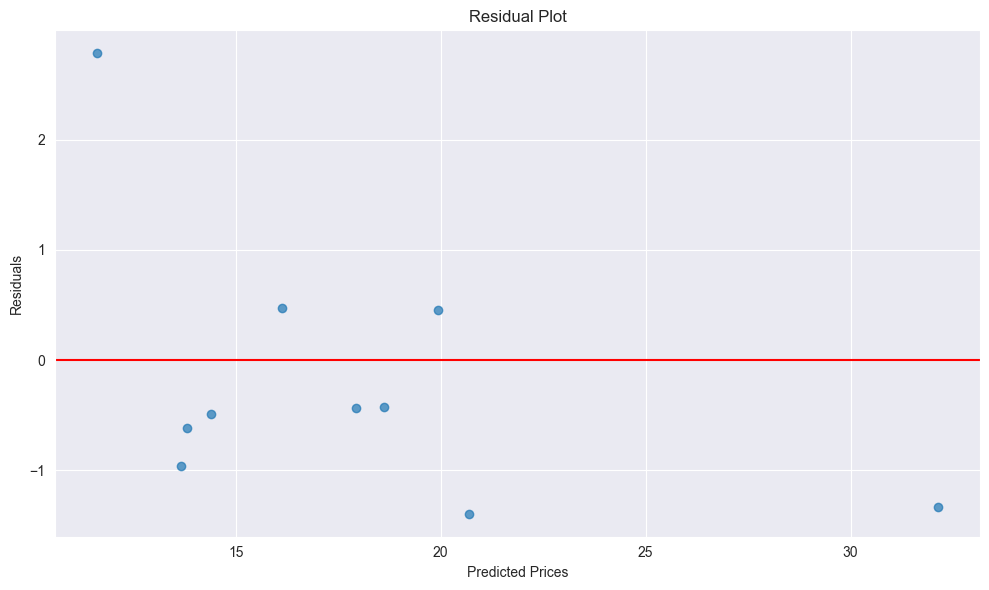

In [64]:
# Visualize residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()